In [1]:
# Reuters veriseti
# https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection

from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) =reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
train_labels[10]

3

In [6]:
kelime_index = reuters.get_word_index()

565248/550378 [==============================] - 0s 0us/step


In [10]:
reverse_word_index = dict(
    [(value, key) for (key, value) in kelime_index.items()]
)

In [14]:
haber_metni = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[10]])

In [15]:
haber_metni

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [16]:
type(train_labels)

numpy.ndarray

In [18]:
import numpy as np

In [20]:
len(np.unique(train_labels)) # 46 farklı haber kategorisi

46

In [21]:
" ".join([reverse_word_index.get(i-3, "?") for i in train_data[100]])

"? opec believes world oil prices should be set around a fixed average price of 18 dlrs a barrel ? assistant general secretary ? al wattari said today in a speech to a european community ec ? opec seminar in luxembourg released here al wattari said opec believes the world energy trade should be kept without restrictions and should be built around a fixed average price of 18 dlrs but he warned that defense of the 18 dlr a barrel level had caused hardship for opec countries who had been forced to curtail production and he warned that such cutbacks by opec states could not be sustained in some cases for opec to stabilize the world oil price at what is now considered the optimal level of 18 dlrs a barrel its member countries have had to undergo severe hardship in ? production al wattari said such cutbacks cannot in certain cases be sustained al wattari said as well as financial and marketing pressures some states depended on associated gas output for domestic use and oil cutbacks had left 

In [22]:
train_labels[100]

20

In [23]:
def seri_vektorizasyonu(seri, boyut=10000):
  sonuclar = np.zeros((len(seri),boyut))
  for i, degerler in enumerate(seri):
    for j in degerler:
      sonuclar[i,j] = 1.
  return sonuclar

In [24]:
x_train = seri_vektorizasyonu(train_data)
x_test = seri_vektorizasyonu(test_data)

In [25]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [26]:
x_train[10]

array([0., 1., 0., ..., 0., 0., 0.])

In [28]:
# Etiket değerleri
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [29]:
# one-hot-encoding (get_dummies'e benzer bir şekilde, kategorik değerleri 0-1 listeye dönüştürmeliyiz)

In [30]:
def one_hot_donustur(labels, boyut=46):
  sonuclar = np.zeros((len(labels), boyut))
  for i, label in enumerate(labels):
    sonuclar[i, label] = 1. 
  return sonuclar

In [31]:
y_train = one_hot_donustur(train_labels)
y_test = one_hot_donustur(test_labels)

In [32]:
train_labels[10]

3

In [33]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
# alternatif one-hot-encoder (Keras hazır fonksiyon kullanımı)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [35]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
# Modelin oluşturulması
# import keras ve layers
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
# model tanımı
model = keras.Sequential([  # 3 tane saklı layer (hidden layer, 32 nodlu), 1 tane output layer 46 nodlu
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")                         
])

In [38]:
# model compile
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
# Validasyon setinin ayrılması 
x_val = x_train[:1000]
x_train_kalan = x_train[1000:]
y_val = y_train[:1000]
y_train_kalan = y_train[1000:] 

In [41]:
# Data fit
history = model.fit(x_train_kalan,
                    y_train_kalan,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 47ms/step - loss: 2.9259 - accuracy: 0.4063 - val_loss: 2.1151 - val_accuracy: 0.5670
Epoch 2/20
16/16 [==============================] - 1s 31ms/step - loss: 1.7835 - accuracy: 0.6234 - val_loss: 1.5970 - val_accuracy: 0.6410
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.3884 - accuracy: 0.6988 - val_loss: 1.3818 - val_accuracy: 0.6850
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 1.1707 - accuracy: 0.7363 - val_loss: 1.2753 - val_accuracy: 0.7130
Epoch 5/20
16/16 [==============================] - 1s 31ms/step - loss: 1.0150 - accuracy: 0.7692 - val_loss: 1.1858 - val_accuracy: 0.7280
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8854 - accuracy: 0.7979 - val_loss: 1.1362 - val_accuracy: 0.7410
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.7731 - accuracy: 0.8250 - val_loss: 1.1159 - val_accuracy: 0.7490
Epoch 8/20
16

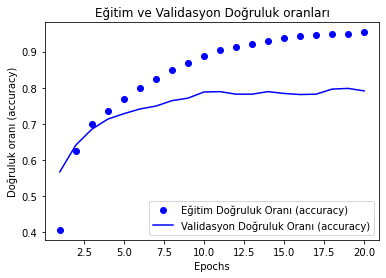

In [44]:
# epochs = 11
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt 
plt.plot(epochs,acc, "bo", label="Eğitim Doğruluk Oranı (accuracy)")
plt.plot(epochs,val_acc, "b", label="Validasyon Doğruluk Oranı (accuracy)")
plt.title("Eğitim ve Validasyon Doğruluk oranları")
plt.xlabel("Epochs")
plt.ylabel("Doğruluk oranı (accuracy)")
plt.legend()
plt.show()

In [46]:
# Epochs=11 için modeli yeni baştan oluştur.
model = keras.Sequential([  # 3 tane saklı layer (hidden layer, 32 nodlu), 1 tane output layer 46 nodlu
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")                         
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=11, # grafikten hesaplanan değer.
          batch_size=512)

Epoch 1/11
18/18 [==============================] - 1s 29ms/step - loss: 3.1097 - accuracy: 0.4683
Epoch 2/11
18/18 [==============================] - 1s 29ms/step - loss: 1.8406 - accuracy: 0.6301
Epoch 3/11
18/18 [==============================] - 1s 31ms/step - loss: 1.3984 - accuracy: 0.7003
Epoch 4/11
18/18 [==============================] - 1s 29ms/step - loss: 1.1534 - accuracy: 0.7387
Epoch 5/11
18/18 [==============================] - 1s 35ms/step - loss: 0.9840 - accuracy: 0.7719
Epoch 6/11
18/18 [==============================] - 1s 36ms/step - loss: 0.8530 - accuracy: 0.8071
Epoch 7/11
18/18 [==============================] - 1s 29ms/step - loss: 0.7379 - accuracy: 0.8331
Epoch 8/11
18/18 [==============================] - 1s 30ms/step - loss: 0.6424 - accuracy: 0.8544
Epoch 9/11
18/18 [==============================] - 1s 30ms/step - loss: 0.5541 - accuracy: 0.8749
Epoch 10/11
18/18 [==============================] - 1s 30ms/step - loss: 0.4838 - accuracy: 0.8904
Epoch 11/

In [47]:
# Model performansının hesaplanması
sonuclar = model.evaluate(x_test,y_test)
print(f"Model performansı: {sonuclar}")
# doğruluk oranı: % 76.3

71/71 [==============================] - 0s 3ms/step - loss: 1.0792 - accuracy: 0.7631
Model performansı: [1.0791521072387695, 0.7631344795227051]


In [51]:
# Eğer kategori belirleme rasgele yapılsaydı?
import copy 
test_labels_kopya = copy.copy(test_labels) 
np.random.shuffle(test_labels_kopya)
rasgele_tahmin_dogruluk = np.array(test_labels) == np.array(test_labels_kopya)
rasgele_tahmin_dogruluk.mean()

0.18076580587711488

(array([1424.,   60.,  188.,  122.,  257.,   70.,   43.,   28.,   31.,
          23.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <a list of 10 Patch objects>)

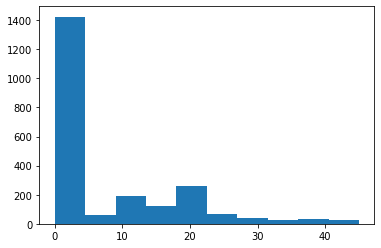

In [52]:
plt.hist(test_labels)

In [53]:
# FARKLI MODELLER

In [54]:
# Model-2: 
# 2 hidden layer 64 node'lu

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")    
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train_kalan,
                    y_train_kalan,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 52ms/step - loss: 2.5941 - accuracy: 0.5336 - val_loss: 1.7178 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4303 - accuracy: 0.7082 - val_loss: 1.3120 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0672 - accuracy: 0.7757 - val_loss: 1.1321 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8407 - accuracy: 0.8232 - val_loss: 1.0248 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6730 - accuracy: 0.8601 - val_loss: 0.9865 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5335 - accuracy: 0.8905 - val_loss: 0.9270 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4247 - accuracy: 0.9112 - val_loss: 0.8975 - val_accuracy: 0.8150
Epoch 8/20
16

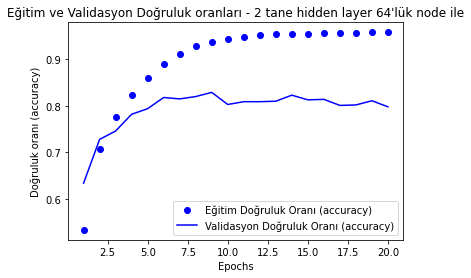

In [57]:
# epochs = 9
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc, "bo", label="Eğitim Doğruluk Oranı (accuracy)")
plt.plot(epochs,val_acc, "b", label="Validasyon Doğruluk Oranı (accuracy)")
plt.title("Eğitim ve Validasyon Doğruluk oranları - 2 tane hidden layer 64'lük node ile")
plt.xlabel("Epochs")
plt.ylabel("Doğruluk oranı (accuracy)")
plt.legend()
plt.show()

In [58]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")    
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=9,
                    batch_size=512)

sonuclar = model.evaluate(x_test,y_test)
print(f"2 hidden layer, 64 + 64 nodes, rmsprop => model performansı: {sonuclar}")

Epoch 1/9
18/18 [==============================] - 1s 40ms/step - loss: 2.5349 - accuracy: 0.5405
Epoch 2/9
18/18 [==============================] - 1s 72ms/step - loss: 1.3328 - accuracy: 0.7206
Epoch 3/9
18/18 [==============================] - 1s 51ms/step - loss: 0.9872 - accuracy: 0.7904
Epoch 4/9
18/18 [==============================] - 1s 39ms/step - loss: 0.7723 - accuracy: 0.8375
Epoch 5/9
18/18 [==============================] - 1s 39ms/step - loss: 0.6092 - accuracy: 0.8741
Epoch 6/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4872 - accuracy: 0.8986
Epoch 7/9
18/18 [==============================] - 1s 37ms/step - loss: 0.3888 - accuracy: 0.9185
Epoch 8/9
18/18 [==============================] - 1s 38ms/step - loss: 0.3221 - accuracy: 0.9291
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.7965
2 hidden layer, 64 + 64 nodes, rmsprop => model performansı: [0.9431003332138062, 0.7965271472930908]


In [59]:
# MODEL-3 (adam optimizer)
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")    
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train_kalan,
                    y_train_kalan,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 3.3001 - accuracy: 0.4503 - val_loss: 2.5226 - val_accuracy: 0.5580
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.9703 - accuracy: 0.6322 - val_loss: 1.6097 - val_accuracy: 0.6560
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.3411 - accuracy: 0.7162 - val_loss: 1.2798 - val_accuracy: 0.7150
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0294 - accuracy: 0.7734 - val_loss: 1.1194 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.8066 - accuracy: 0.8275 - val_loss: 1.0172 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6292 - accuracy: 0.8698 - val_loss: 0.9528 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4867 - accuracy: 0.8996 - val_loss: 0.9086 - val_accuracy: 0.8100
Epoch 8/20
16

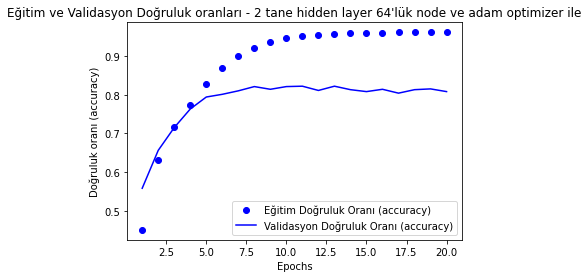

In [60]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc, "bo", label="Eğitim Doğruluk Oranı (accuracy)")
plt.plot(epochs,val_acc, "b", label="Validasyon Doğruluk Oranı (accuracy)")
plt.title("Eğitim ve Validasyon Doğruluk oranları - 2 tane hidden layer 64'lük node ve adam optimizer ile")
plt.xlabel("Epochs")
plt.ylabel("Doğruluk oranı (accuracy)")
plt.legend()
plt.show()

In [61]:
# epochs = 8
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")    
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512)

sonuclar = model.evaluate(x_test,y_test)
print(f"2 hidden layer, 64 + 64 nodes, adam optimizer => model performansı: {sonuclar}")

Epoch 1/8
18/18 [==============================] - 2s 49ms/step - loss: 3.3502 - accuracy: 0.3804
Epoch 2/8
18/18 [==============================] - 1s 45ms/step - loss: 2.0901 - accuracy: 0.6303
Epoch 3/8
18/18 [==============================] - 1s 37ms/step - loss: 1.3208 - accuracy: 0.7141
Epoch 4/8
18/18 [==============================] - 1s 37ms/step - loss: 0.9787 - accuracy: 0.7862
Epoch 5/8
18/18 [==============================] - 1s 37ms/step - loss: 0.7589 - accuracy: 0.8418
Epoch 6/8
18/18 [==============================] - 1s 36ms/step - loss: 0.5887 - accuracy: 0.8811
Epoch 7/8
18/18 [==============================] - 1s 37ms/step - loss: 0.4595 - accuracy: 0.9045
Epoch 8/8
71/71 [==============================] - 0s 2ms/step - loss: 0.9254 - accuracy: 0.7934
2 hidden layer, 64 + 64 nodes, adam optimizer => model performansı: [0.9253860116004944, 0.7934104800224304]


In [62]:
# BOSTON EV FİYATLARININ TAHMİN EDİLMESİ
from tensorflow.keras.datasets import boston_housing

In [63]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

65536/57026 [==================================] - 0s 0us/step


In [64]:
train_data.shape

(404, 13)

In [65]:
test_data.shape

(102, 13)

In [66]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

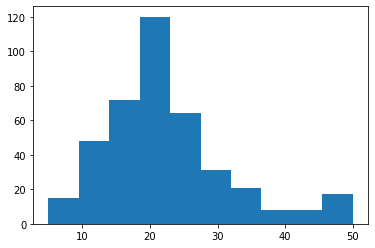

In [67]:
plt.hist(train_targets)

In [68]:
# DATA NORMALİZASYONU
ortalama = train_data.mean(axis=0)
train_data = train_data - ortalama # ortalama = 0
std = train_data.std(axis=0)
train_data = train_data / std # standart sapma = 1
# aynı dönüşüm işlemi test veri setinde de yapılmalı
test_data = test_data - ortalama
test_data = test_data / std

In [70]:
train_data.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.80933376e-15, -7.80453809e-17,
       -5.25047552e-15,  6.43187374e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.05526149e-16,  2.36614908e-14,  5.96710525e-15,
        6.13920356e-16])

In [71]:
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
# Model oluştur
def yeni_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # mse: Mean squared error,  mae: mean absolute error
  return model

In [ ]:
# K-fold cross-validation


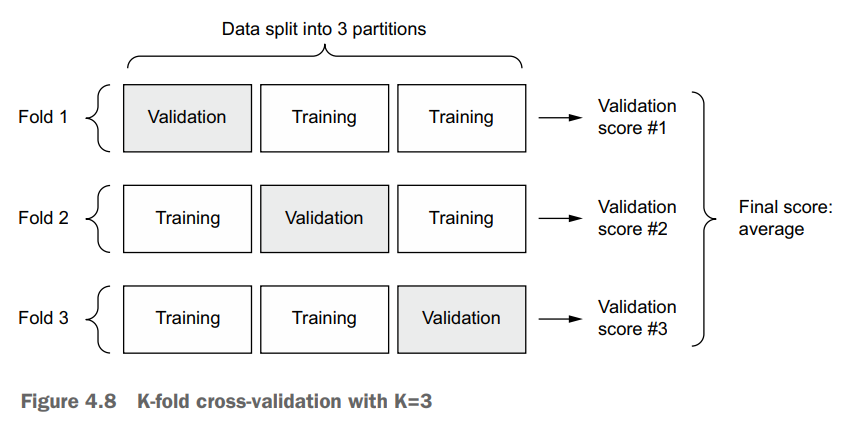

In [73]:
k = 4
num_val_samples = len(train_data) // k # //: tamsayı sonuç
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold # {i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  kalan_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],axis=0)
  kalan_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],axis=0)
  model = yeni_model()
  model.fit(kalan_train_data,kalan_train_targets,epochs=num_epochs,batch_size=16,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [74]:
all_scores

[2.1350512504577637, 2.46467661857605, 2.496006965637207, 2.423469066619873]

In [75]:
np.mean(all_scores)

2.3798009753227234

In [76]:
num_val_samples = len(train_data) // k # //: tamsayı sonuç
num_epochs = 200 # !
all_scores = []
for i in range(k):
  print(f"Processing fold # {i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  kalan_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],axis=0)
  kalan_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],axis=0)
  model = yeni_model()
  model.fit(kalan_train_data,kalan_train_targets,epochs=num_epochs,batch_size=16,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
np.mean(all_scores)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


2.3370927274227142

In [81]:
def hesapla_epoch_perf(num_epochs,train_data,train_targets):
  all_scores = []
  for i in range(k):
    print(f"Processing fold # {i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    kalan_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],axis=0)
    kalan_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],axis=0)
    model = yeni_model()
    model.fit(kalan_train_data,kalan_train_targets,epochs=num_epochs,batch_size=16,verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
  return np.mean(all_scores)

In [78]:
mae_epoch_50 = hesapla_epoch_perf(50, train_data,train_targets)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [79]:
print(mae_epoch_50)

2.3520129919052124


In [82]:
epoch_vals = [50,100,150,200,300,400,500]
for epoch_val in epoch_vals:
  mae = hesapla_epoch_perf(epoch_val,train_data,train_targets)
  print(f" epoch={epoch_val} => mae={mae}")

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=50 => mae=2.4404773116111755
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=100 => mae=2.295438915491104
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=150 => mae=2.3090766072273254
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=200 => mae=2.244510054588318
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=300 => mae=2.358342707157135
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=400 => mae=2.462442636489868
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
 epoch=500 => mae=2.5960022807121277


In [83]:
# optimum epoch=200 (data detaylı arama yapılabilir.)

model = yeni_model()
model.fit(train_data, train_targets, epochs=200, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 14.1592 - mae: 2.4320


In [84]:
print(test_mse_score,test_mae_score)

14.159187316894531 2.4320242404937744
